In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# We are gonna read the titanic_train CSV file into a pandas dataframe so that we can train our model with it later on
train = pd.read_csv('datasets/titanic_train.csv')

In [4]:
# 1 if the passanger has survived, 0 otherwise
# SibSp: the number of the siblings and/or spouses aboard
# Parch: the number of parents/children aboard
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Almost all the times, we are going to have missing data.
# We are going to use seaborn to create a simple heatmap 
# to see where we are missing the most of our data.

In [6]:
train.isnull() # We are going to use this dataframe for our heatmap

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


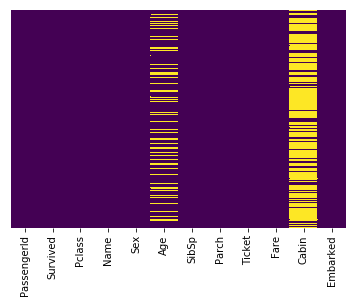

In [7]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Every yellow line stands for a null value.
<br><br>
So we can conclude that we are missing __some age information__ and we are missing __A LOT of cabin information__.
<br><br>
~20% of the age information is missing. And that is not that big of a number so that we can _imputate_ those missing columns by using the knowledge of the other columns to fill in reasonable values for that age column.
<br><br>
On the other hand, we are missing way too much information on the cabin data, because of that, we are just gonna drop it for good.

In [8]:
sns.set_style('whitegrid')

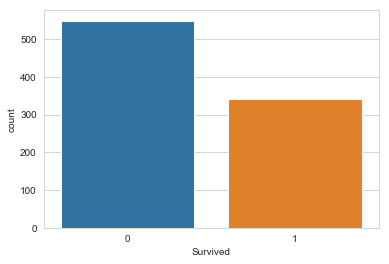

In [9]:
sns.countplot(x='Survived', data=train)

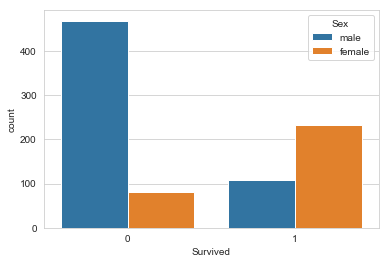

In [10]:
sns.countplot(x='Survived', data=train, hue='Sex')

We can see that the number of deaths are is higher for men than it is for women.

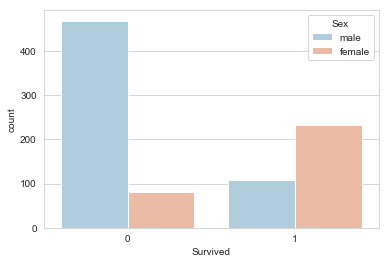

In [11]:
sns.countplot(x='Survived', data=train, hue='Sex', palette='RdBu_r')

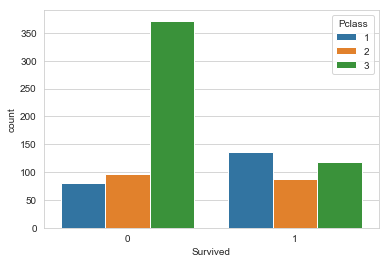

In [12]:
sns.countplot(x='Survived', data=train, hue='Pclass')

So we can conclude that those who died are mostly from the Passanger Class 3. However, there isn't a visible trend like that for the ones who survived.

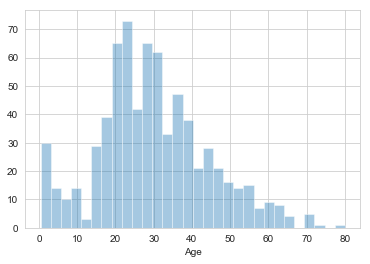

In [13]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


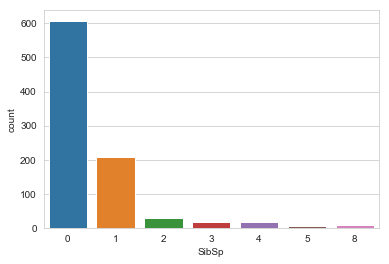

In [15]:
sns.countplot(x='SibSp', data=train)

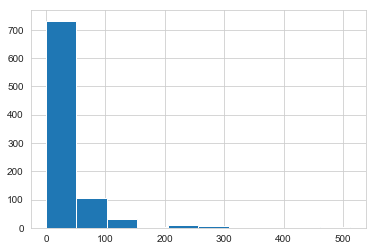

In [16]:
train['Fare'].hist()

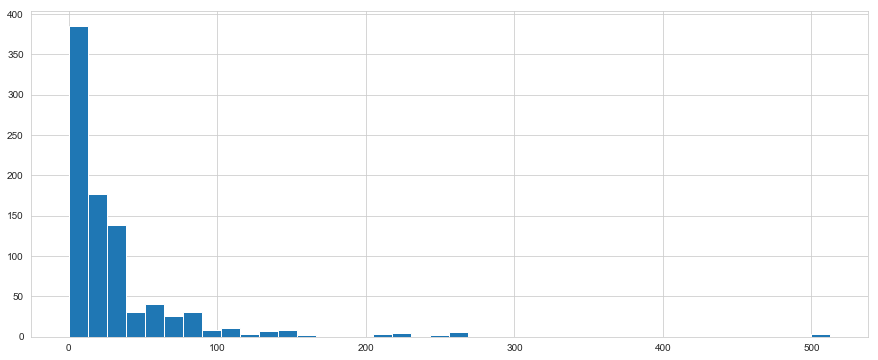

In [17]:
train['Fare'].hist(bins=40, figsize=(15,6))

## Cleaning our Data

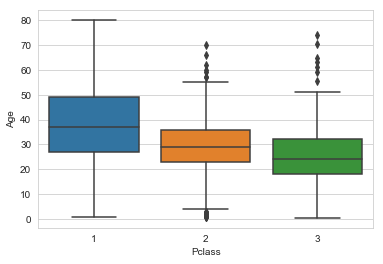

In [18]:
sns.boxplot(x='Pclass', y='Age', data=train)

We can see that the wealthier people in the Passenger Class 1 are a bit older than those who are in the Pclass 2 and 3.

In [19]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37 # mean
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [20]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1) # axis 1 because we want to apply it across the columns

What we are doing here is really simple. We are just filling in the missing Age values.

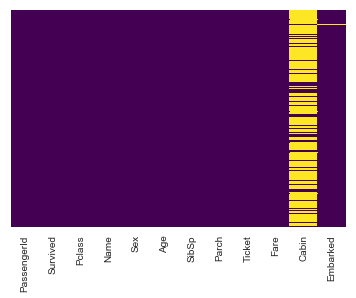

In [21]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

We that we don't have any null values in the Age column anymore.

But for the Cabin column, there are way too many missing values, so it would be better off if we just drop that column for good.

In [22]:
train.drop('Cabin', axis=1, inplace=True)

In [23]:
train.head() # no more cabin column anymore

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


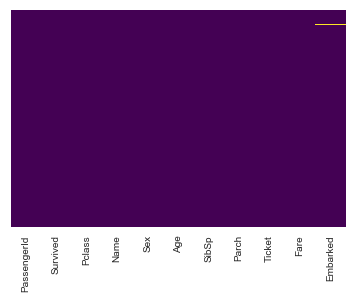

In [24]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

We only have very few missing values on the Embarked column. I am just gonna get rid of them too.

In [25]:
train.dropna(inplace=True)

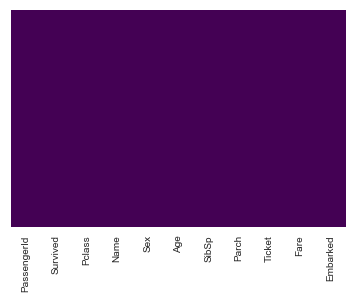

In [26]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Good, no more missing values.

Now we are gonna turn the categorical features into dummy variables. Otherwise, our machine learning algorithm will not be directly take in those features as inputs.

In [27]:
pd.get_dummies(train['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
5,0,1
6,0,1
7,0,1
8,1,0
9,1,0


Now we have a dataframe with a column for every single category. There is one slight issue with this. One column is a perfect predictor of the other column. If we know that a person is a female, then we know that the person is NOT a male. And if our machine learning algorithm gets feed both columns, the machine learning algorithm will immediately know that, and this is going to be an issue known as __multicollinearity__ and it will basically mess up the algorithm because one column will be a perfect predictor of another column. We want to avoid this of course.

In [28]:
pd.get_dummies(train['Sex'], drop_first=True)

,male
0,1
1,0
2,0
3,0
4,1
5,1
6,1
7,1
8,0
9,0


In [29]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [30]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [31]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [32]:
train = pd.concat([train, sex, embark], axis=1)

In [33]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


Since we have the `male` and `Q`, `S` columns, we don't need the `Sex` and the `Embarked` columns anymore.

In [34]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True) # axis 1 cause they're all columns

In [35]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Notice that the `PassengerId` column is basically an index column. So, eventhough it is numerical, we don't really need it. 

In [36]:
train.drop(['PassengerId'], axis=1, inplace=True)

In [37]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


Notice that the `Pclass` column is __also categorical__. So we should probably call `pd.get_dummies()` method on that too! But I am not gonna do it right now and create my ML model as it is right now. After that I am gonna call the dummy function and try to see whether there's any differences.